In [ ]:
!pip install mplcyberpunk

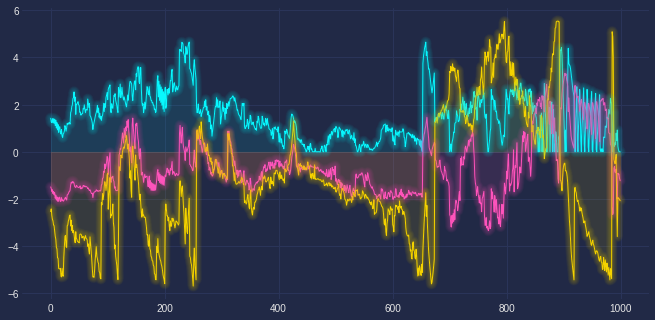

In [33]:
import mplcyberpunk,pandas as pd,pylab as pl
pl.style.use("cyberpunk")
path='https://olgabelitskaya.github.io/'
dfv=pd.read_csv(path+'beethoven.csv')
f=pl.figure(figsize=(10,5))
ax=f.add_subplot(111)
ax.plot(dfv.values[:1000,],lw=1)
mplcyberpunk.add_glow_effects();

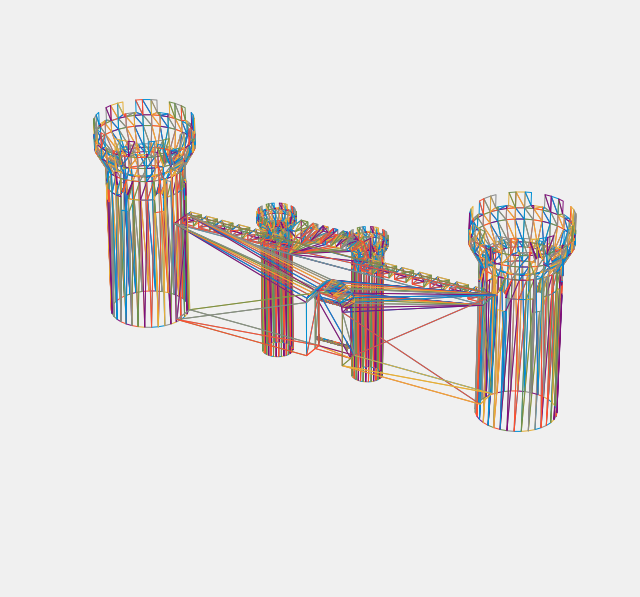

In [34]:
import pandas as pd,pylab as pl
pl.style.use("fivethirtyeight")
path='https://olgabelitskaya.github.io/'
dfv=pd.read_csv(path+'castle.csv')
dfe=pd.read_csv(path+'castle2.csv')
dfe['v4']=0; l=600
v=dfv.values; e=dfe.values
e[:,3]=e[:,0]
f=pl.figure(figsize=(10,10))
ax=f.add_subplot(111,projection='3d')
for i in range(e.shape[0]):
    ed=[el-1 for el in e[i] if el!=0]
    ax.plot(v[ed,0],v[ed,1],v[ed,2],lw=1)
ax.set_xlim([-l,l]); ax.set_ylim([-l,l])
ax.set_zlim([-l+300,l+300])
ax.set_axis_off();

In [35]:
import pandas as pd,cufflinks as cf
from plotly.offline import init_notebook_mode
from IPython.display import display,HTML
def configure_plotly():
  display(HTML('''
  <script src="/static/components/requirejs/require.js"></script>
  <script>requirejs.config({
      paths:{base:"/static/base",
             plotly:"https://cdn.plot.ly/plotly-1.5.1.min.js?noext"}});
  </script>'''))
cf.go_offline(); configure_plotly()
init_notebook_mode(connected=False)
pd.set_option('display.float_format',lambda x:'%.6f'%x)
url='https://raw.githubusercontent.com/noahgift/'+\
    'real_estate_ml/master/data/'+\
    'Zip_Zhvi_SingleFamilyResidence.csv'
re=pd.read_csv(url).dropna().astype({'RegionID':'int'})\
     .astype({'RegionName':'int'}).astype({'SizeRank':'int'})
re_median=pd.concat([re[re["CountyName"]=="Los Angeles"].median(),
                     re[re["CountyName"]=="San Francisco"].median(),
                     re.median()],axis=1,sort=False).iloc[3:]
re_median.columns=["Los Angeles","San Francisco","Median USA"]
layout=cf.Layout(height=500,width=900)
re_median.iplot(title="Median Single Family Home Prices 1996-2017",
                xTitle="Year",yTitle="Sales Price",
                shape=(4,1),fill=True,layout=layout)
re_median.T.iloc[:,:7]

Output hidden; open in https://colab.research.google.com to view.

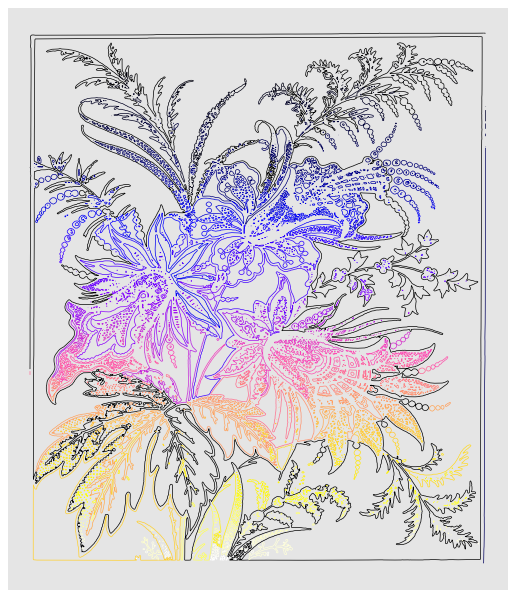

In [36]:
import pylab; from skimage import io,color,measure
cmaps=['ocean','cool','gnuplot2','terrain',
       'winter','spring','summer','autumn']
pylab.style.use('ggplot')
def vector(fn,cm,level=.85):
    path1='https://olgabelitskaya.github.io/'
    path2='pattern0%s'%(fn+3)+'.jpeg'
    img=io.imread(path1+path2); level=level
    gray_img=color.colorconv.rgb2grey(img) 
    contours=measure.find_contours(gray_img,level)
    n=len(contours); pylab.figure(figsize=(8,10))
    pylab.gca().invert_yaxis()
    [pylab.plot(contours[i][:,1],contours[i][:,0],lw=.7,
                color=pylab.get_cmap(cm)(i/n)) 
     for i in range(n)]
    pylab.xticks([]); pylab.yticks([]); pylab.show()
vector(1,cmaps[2])  

In [38]:
import pandas as pd,cufflinks as cf
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
def configure_plotly():
  display(IPython.core.display.HTML('''
  <script src="/static/components/requirejs/require.js"></script>
  <script>requirejs.config({
      paths:{base:"/static/base",
             plotly:"https://cdn.plot.ly/plotly-1.5.1.min.js?noext"}});
  </script>'''))
cf.go_offline(); configure_plotly()
x=[1,2,3,4,5]; y=[.2,.9,.7,.3,.4]
init_notebook_mode(connected=False)
go1=[go.Bar(x=x,y=y,marker=dict(color=y))]
layout1=go.Layout(width=500,height=500,
                  template='plotly_dark')
iplot({"data":go1,"layout":layout1})

Output hidden; open in https://colab.research.google.com to view.